In [24]:
import sys
import os
import numpy as np

## replace with root project dir
PROJECT_DIR = "/mnt/workspace/__ing/llming/DTC/audio_podcast_qa_assistant"
sys.path.append(PROJECT_DIR)

from utils.utils import initialize_env_variables, read_json_file,save_to_pickle, load_pickle

from utils.ollama import get_embedding, embed_document
from utils.multithread import map_progress

initialize_env_variables()

from utils.query import ES_CLIENT, OLLAMA_CLIENT, INDEX_NAME, elastic_search_hybrid_rrf
from utils.huggingface import vectorize_text, vectorize_document

from sentence_transformers import SentenceTransformer

cache_dir = os.path.join(PROJECT_DIR, "hf_cache")

Initialized environment variables listed in: /mnt/workspace/__ing/llming/DTC/audio_podcast_qa_assistant/.env


In [2]:
model_name = "nomic-embed-text"
model = SentenceTransformer(
    "nomic-ai/nomic-embed-text-v1.5",
    trust_remote_code=True,
    cache_folder=cache_dir
)

<All keys matched successfully>


In [6]:
q = "What are some examples of visual learning applications in language or other domains?"
ans1 = "So the entire ImageNet data set has about 22,000 concepts and about 14 million images. So these concepts are basically just nouns and they're annotated on images. And this entire data set was a mammoth data collection effort that actually gave rise to a lot of powerful learning algorithms is credited with like sort of the rise of deep learning as well. But this data set took about 22 human years to collect, to annotate."
ans2 = "And it's not even that many concepts, right? It's not even that many images. 14 million is nothing really. Like you have about, I think, 400 million images or so, or even more than that uploaded to most of the popular sort of social media websites today. So now supervised learning just doesn't scale. If I want to now annotate more concepts, if I want to have this various types of fine-grained concepts then it won't really scale. So now you come up to these sort of different learning paradigms, for example, semi-supervised learning, where the idea is, of course, you have this annotated corpus of supervised data and you have lots of these unlabeled images. And the idea is that the algorithm should basically try to measure some kind of consistency or really try to measure some kind of signal on this sort of unlabeled data to make itself more confident about what it's really trying to predict. So by access to this lots of unlabeled data, the idea is that the algorithm actually learns to be more confident and actually gets better at predicting these concepts. And now we come to the other extreme, which is like self-supervised learning. The idea basically is that the machine or the algorithm should really discover concepts or discover things about the world or learn representations about the world which are useful without access to explicit human supervision. So the word supervision is still in the term self-supervised. So what is the supervision signal? And maybe that perhaps is when Jan Makun and you argue that unsupervised is the incorrect in terminology here. So what is the supervision signal when the humans aren't part of the picture or not a big part of the picture? Right. So self-supervised, the reason it has the term supervising itself is because you're using the data itself as supervision. So because the data serves as its own source of supervision, it's self-supervised in that way."
ans3 = "What are the positive deviance of the statistical deviance to see what is actually possible? Then say, what are the conditioning factors and can we condition those across a few of them simultaneously? Could we build a civilization like that? That's a very interesting question. There's this kind of real politic idea that humans are violent, large groups of humans become violent, they become irrational, specifically those two things, rivalrous and violent and irrational. In order to minimize the total amount of violence and have some good decisions, they need rules somehow. Not getting that is some kind of naive utopianism that doesn't understand human nature yet. This gets back to like mimesis of desire as an inexorable thing. I think the idea of the masses is actually a kind of propaganda that is useful for the classes that control to popularize the idea that most people are too violent, lazy, undisciplined and irrational to make good choices and therefore their choices should be sublimated in some kind of way. I think that if we look back at these conditioning environments, we can say, okay, so the kids go to a really fancy school and have a good developmental environment like Exeter Academy. There's still a Gaussian distribution of how well they do on any particular metric, but on average they become senators and the worst ones become high-end lawyers or whatever. Then I look at an inner city school with a totally different set of things and I see a very, very differently displaced Gaussian distribution, but a very different set of conditioning factors. When I say the masses, well, if all those kids who were one of the parts of the masses got to go to Exeter and have that family and whatever, would they still be the masses? Could we actually condition more social virtue, more civic virtue, more orientation towards dialectical synthesis, more empathy, more rationality widely? Yes."
ans4 = "So we can say, okay, how many were there? All these orders of magnitude, 10 to the 26 meters away, there's the edge of our observable universe. If it's farther than that, light hasn't even reached us yet. If it's less than 10 to the 16 meters away, well, it's within Earth's range. It's no farther away than the sun. We can definitely rule that out. So I think about it like this. A priori, before we looked with telescopes, it could be 10 to 10 meters, 10 to 20, 10 to 30, 10 to 40, 10 to 50, 10 to blah, blah, equally likely anywhere here. And now we've ruled out this chunk. Yeah. And most of it is outside. And here is the edge of our observable universe already. So I'm certainly not saying I don't think there's any life elsewhere in space. If space is infinite, then you're basically 100% guaranteed that there is. But the probability that there is life, that the nearest neighbor happens to be in this little region between where we would have seen it already and where we will never see it, there's actually significantly less than one, I think. And I think there's a moral lesson from this, which is really important, which is to be good stewards of this planet and this shot we've had. It can be very dangerous to say, oh, it's fine if we nuke our planet or ruin the climate or mess it up with unaligned AI, because I know there is this nice Star Trek fleet out there. They're going to swoop in and take over where we failed. Just like it wasn't the big deal that the Easter Island losers wiped themselves out. That's a dangerous way of lulling yourself into false sense of security. If it's actually the case that it might be up to us and only us, the whole future of intelligent life in our observable universe, then I think it really puts a lot of responsibility on our shoulders. It's inspiring. It's a little bit terrifying, but it's also inspiring."

In [7]:
q_v = get_embedding(OLLAMA_CLIENT, q, model_name=model_name)
ans1_v = get_embedding(OLLAMA_CLIENT, ans1, model_name=model_name)
ans2_v = get_embedding(OLLAMA_CLIENT, ans2, model_name=model_name)
ans3_v = get_embedding(OLLAMA_CLIENT, ans3, model_name=model_name)
ans4_v = get_embedding(OLLAMA_CLIENT, ans4, model_name=model_name)

In [8]:
print(np.dot(q_v, ans1_v))
print(np.dot(q_v, ans2_v))
print(np.dot(q_v, ans3_v))
print(np.dot(q_v, ans4_v))

0.5429503972417542
0.5305589674729791
0.39795179726303065
0.3241485963296668


# Same output as HF's peer

In [3]:
sentence = 'search_document: TSNE is a dimensionality reduction algorithm created by Laurens van Der Maaten'

In [9]:
embeddings = vectorize_text(model, sentence, precision=10)

In [11]:
model_name = "nomic-embed-text"
embeddings_o = get_embedding(OLLAMA_CLIENT, sentence, model_name=model_name)

In [12]:
np.dot(embeddings, embeddings_o)

0.9999999176817029

# Vectorize documents

In [14]:
documents = read_json_file("/mnt/workspace/__ing/llming/DTC/audio_podcast_qa_assistant/data/generated_documents/documents.json")

In [19]:
vectorized_documents = map_progress(
    f=lambda document: vectorize_document(
        model, document),
    seq=documents,
    max_workers=6,
    verbose=False
)

  0%|          | 0/30681 [00:00<?, ?it/s]

In [22]:
save_to_pickle(vectorized_documents,
"/mnt/workspace/__ing/llming/DTC/audio_podcast_qa_assistant/data/generated_embeddings/HF_vectorized_documents.pkl")

In [25]:
vectorized_documents_o = load_pickle("/mnt/workspace/__ing/llming/DTC/audio_podcast_qa_assistant/data/generated_embeddings/vectorized_documents.pkl")

In [37]:
# Make sure of order (might differ due to parallelism)
for i in range(len(vectorized_documents_o)):
    if vectorized_documents_o[i]['id'] != vectorized_documents[i]['id'] or \
        vectorized_documents_o[i]['chunk_id'] != vectorized_documents[i]['chunk_id']:
            print("not ordered:", i)
            break

In [45]:
def euclidean_distance(vec1, vec2):
    """
    Calculate the Euclidean distance between two vectors.

    Args:
        vec1 (list or np.array): The first vector.
        vec2 (list or np.array): The second vector.

    Returns:
        float: The Euclidean distance between the two vectors.
    """
    vec1 = np.array(vec1)
    vec2 = np.array(vec2)
    return np.linalg.norm(vec1 - vec2)

ds = []
anomalies = []

for i in range(len(vectorized_documents_o)):
    doc1 = vectorized_documents_o[i].copy()
    doc2 = vectorized_documents[i].copy()
    
    d = euclidean_distance(
        doc1["text_vector"],
        doc2["text_vector"],        
    )
    
    if d > 0.2:
        doc1.pop("text_vector")
        doc2.pop("text_vector")
        anomalies.append((doc1, doc2))
    ds.append(d)

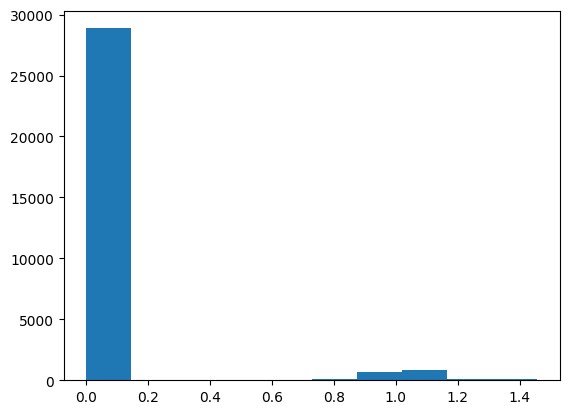

In [47]:
import matplotlib.pyplot as plt
_ = plt.hist(ds)

In [48]:
np.quantile(ds, [0, 0.25, 0.5, 0.75, 0.9, 0.95, 0.99, 1])

array([3.61241517e-04, 4.31984498e-04, 4.48801392e-04, 4.67616813e-04,
       4.91335271e-04, 9.30118088e-01, 1.13437293e+00, 1.45667581e+00])

In [52]:
x=get_embedding(OLLAMA_CLIENT, anomalies[0][0]["title"]+"\n"+anomalies[0][0]["text"])
y=vectorize_text(model, anomalies[0][0]["title"]+"\n"+anomalies[0][0]["text"])

In [53]:
np.dot(x,y)

0.5878278307835667